In [1]:
import pandas as pd
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
inputs = df[['Pclass', 'Age', 'Sex', 'Fare']]
target = df['Survived']

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

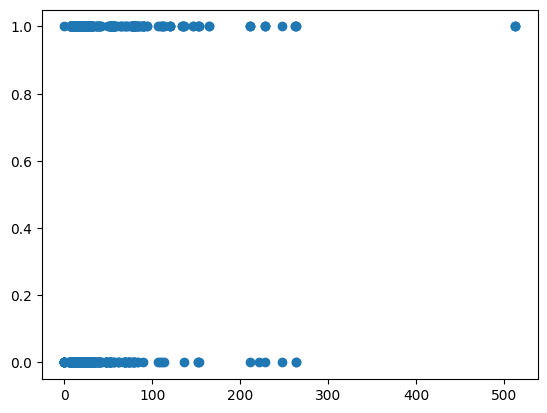

In [4]:
plt.scatter(inputs['Fare'], target)

In [5]:
inputs.head()

,Pclass,Age,Sex,Fare
0,3,22.0,male,7.2500
1,1,38.0,female,71.2833
2,3,26.0,female,7.9250
3,1,35.0,female,53.1000
4,3,35.0,male,8.0500


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
inputs['sex_le'] = le.fit_transform(df['Sex'])

/tmp/ipykernel_141089/1616078622.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs['sex_le'] = le.fit_transform(df['Sex'])


In [7]:
import math
inputs["Age"] = inputs["Age"].fillna(math.floor(inputs['Age'].mean()))

/tmp/ipykernel_141089/2147224062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs["Age"] = inputs["Age"].fillna(math.floor(inputs['Age'].mean()))


In [8]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    29.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [9]:
inputs_n = inputs.drop("Sex", axis="columns")

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_n, target, test_size=0.2)

In [11]:
X_train.shape

(712, 4)

In [12]:
X_train

,Pclass,Age,Fare,sex_le
801,2,31.0,26.2500,0
882,3,22.0,10.5167,0
125,3,12.0,11.2417,1
390,1,36.0,120.0000,1
802,1,11.0,120.0000,1
...,...,...,...,...
190,2,32.0,13.0000,0
463,2,48.0,13.0000,1
571,1,53.0,51.4792,0
242,2,29.0,10.5000,1


In [13]:
from sklearn import tree

In [14]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
model.score(X_test, y_test)

0.8044692737430168